___
### IMPORTS

In [2]:
# Modules used for data handling / test
import pickle

from utils import get_collection, show_collection, mklist


# Modules used for EDA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns




# Modules used for image processing


from collections import Counter
from utils import crop_img, chi_osc, extract_img_data, get_img_rgb
from utils import resize_img, reduce_col_palette, whitespace


# Modules used for ML
from utils_ML import reg_scoring, clas_scoring


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Example datasets
from sklearn.datasets import load_iris, make_moons
# Regression metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
# Classification metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
# Train/test
from sklearn.model_selection import train_test_split
# Regression
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
# Preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# Decision trees
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

from utils import c_matrix_bin

In [3]:
# Modules settings
%matplotlib inline

sns.set_theme(style='whitegrid', rc={'figure.figsize': (20, 10)})

In [4]:
# UTILS
# To get model scoring for regression models
def model_scoring_regression(name, model, x, y, set='test'):
    name = f'{name.upper()} ({set} data)'
    preds = model.predict(x)

    metrics = pd.DataFrame({name: [f'{model.score(x, y):.10f}',
                                   f'{mean_absolute_error(y, preds):.10f}',
                                   f'{mean_absolute_percentage_error(y, preds):.10f}',
                                   f'{mean_squared_error(y, preds):.10f}',
                                   f'{np.sqrt(mean_squared_error(y, preds)):.10f}']},
                           index=[['Score (R2 coef.)', 'MAE', 'MAPE', 'MSE', 'RMSE']])

    return metrics

# To get model scoring for classification models
def model_scoring_classification(name, model, x, y, set='test'):
    name = f'{name.upper()} ({set} data)'
    preds = model.predict(x)

    metrics = pd.DataFrame({name: [f'{accuracy_score(y, preds):.10f}',
                                   f'{precision_score(y, preds):.10f}',
                                   f'{recall_score(y, preds):.10f}',
                                   f'{f1_score(y, preds):.10f}',
                                   f'{roc_auc_score(y, preds):.10f}']},
                           index=[['Accuracy (TP + TN/TT)', 'Precision (TP/TP + FP)', 'Recall (TP/TP + FN)',
                                   'F1 (har_mean Ac, Re)', 'ROC AUC']])

    return metrics


# Show polynomial regression
def viz_poly(model, x, x_poly, y):
    plt.scatter(x, y, color='darkred')
    plt.plot(x, model.predict(x_poly), color='cornflowerblue')
    plt.title(nameof(model, globals()))
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()

    return


# To return the name of an object
def nameof(obj, namespace):
    return [name for name in namespace if namespace[name] is obj][0]

___
### UPDATE UTILS

In [5]:
# This cell only needs to be executed to update utils
# if modified after been imported

%run utils_ML

___
### GETTING DATASET

In [ ]:
with open('./data/clean_data', 'rb') as file:
    museum = pickle.load(file)
        
    X = pickle.load(file)
    y_artist = pickle.load(file)
    y_group = pickle.load(file)
    
    X_artist_over = pickle.load(file)
    y_artist_over = pickle.load(file)
    X_group_over = pickle.load(file)
    y_group_over = pickle.load(file)
    
    X_artist_under = pickle.load(file)
    y_artist_under = pickle.load(file)
    X_group_under = pickle.load(file)
    y_group_under = pickle.load(file)

___
### TRAIN/TEST SPLIT

In [5]:
# Define target tags
groups = ['classic', 'vanguards']
artists = ['caravaggio', 'degas', 'goya', 'hokusai', 'kahlo',
           'kandinsky', 'klimt', 'lichtenstein', 'mondrian', 'monet',
           'picasso', 'pollock', 'sorolla', 'velazquez', 'warhol']

In [12]:
# Generate train/test data (25%)
# Rename variables for easier handling
X0_train, X0_test, y0_train, y0_test = train_test_split(X,
                                                        y_group,
                                                        test_size=.25,
                                                        random_state=42)

X1_train, X1_test, y1_train, y1_test = train_test_split(X_group_over,
                                                        y_group_over,
                                                        test_size=.25,
                                                        random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(X_group_under,
                                                        y_group_under,
                                                        test_size=.25,
                                                        random_state=42)

X3_train, X3_test, y3_train, y3_test = train_test_split(X,
                                                        y_artist,
                                                        test_size=.25,
                                                        random_state=42)

X4_train, X4_test, y4_train, y4_test = train_test_split(X_artist_over,
                                                        y_artist_over,
                                                        test_size=.25,
                                                        random_state=42)

X5_train, X5_test, y5_train, y5_test = train_test_split(X_artist_under,
                                                        y_artist_under,
                                                        test_size=.25,
                                                        random_state=42)

___
### BASIC EDA

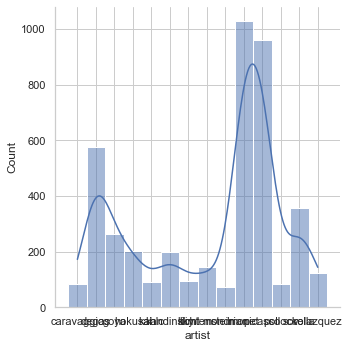

In [ ]:
sns.displot(museum['artist'], kde=True)

# I will try a decision tree

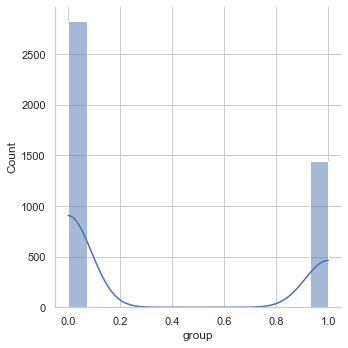

In [ ]:
sns.displot(museum['group'], kde=True)

# I will try a logistic regresion

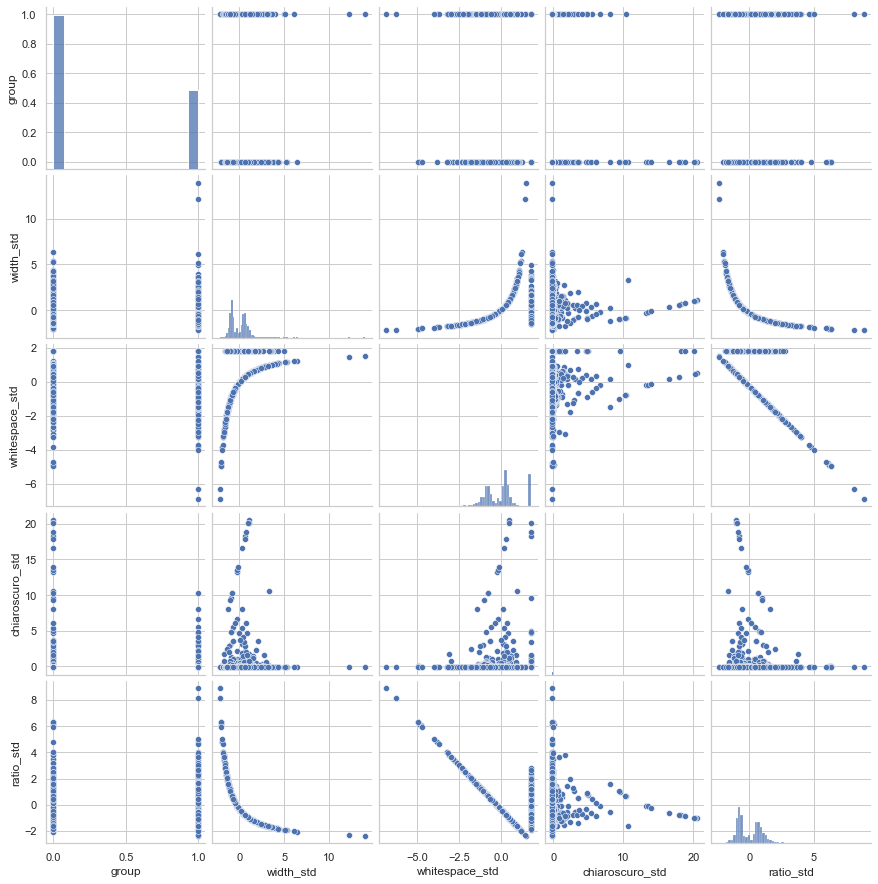

In [ ]:
sns.pairplot(museum.loc[:, ['artist', 'group', 'width_std', 'whitespace_std', 'chiaroscuro_std', 'ratio_std']])
plt.show()

<AxesSubplot:>

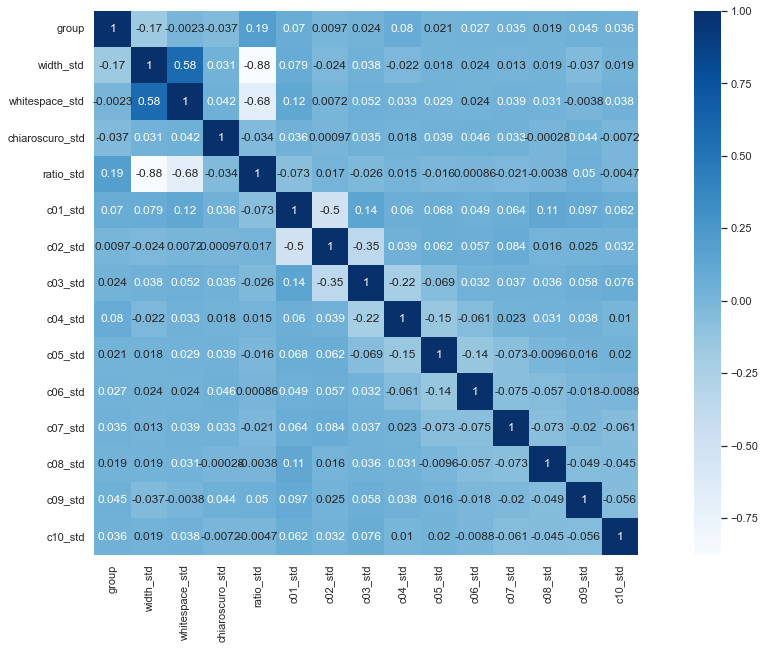

In [ ]:
sns.heatmap(museum.corr(), square=True, annot=True, cmap='Blues')

<Figure size 1440x3600 with 0 Axes>

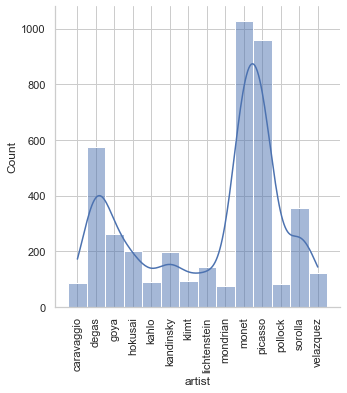

In [ ]:
plt.figure(figsize=(20,50))
ax = sns.displot(museum['artist'], kde=True)
plt.xticks(rotation=90);

___
### MODEL SELECTION:

**SUPERVISED MODELS:**

*~~LINEAR REGRESION~~*  
*~~POLYNOMIAL REGRESION~~*  
LOGISTIC REGRESION with museum_data (MD0, MD1, MD2)  
DECISION TREE with museum_data (MD3, MD4, MD5)  
*~~KNN~~*  
*~~SVM~~*  


**NON SUPERVISED MODELS:**  

*~~PCA~~*  
KMEANS with raw_images used to build museum_img dataset  
NEURAL NETWORK with museum_img  
CONVOLUTIONAL NEURAL NETWORK with museum_img  

In [ ]:
# REGRESION LOGISTICA
grid_logreg = {                   
                     "penalty": ["l1","l2"], # Regularizaciones L1 y L2.
                     "C": [0.1, 0.5, 1.0, 5.0], # Cuanta regularizacion queremos
                     
                     "max_iter": [50,100,500],  # Iteraciones del Gradient Descent. No suele impactar mucho
                                                # pero en ocasiones aparecen warnings diciendo que se aumente
                     
                     "solver": ["liblinear"]  # Suele ser el más rápido
                    }


# KNN
grid_neighbors = {"n_neighbors": [3,5,7,9,11],       # Pares acepta sklearn, pero se suele poner impares, por los empates
                  "weights": ["uniform","distance"]  # Ponderar o no las clasificaciones en 
                                                     # función de la inversa de la distancia a cada vecino
                  }
# ARBOL DE DECISION
grid_arbol = {"max_depth":list(range(1,10)) # Profundidades del árbol. Cuanto más profundo, mas posibilidades de overfitting,
                                            # pero  mas preciso en entrenamiento.
              }


# RANDOM FOREST
grid_random_forest = {"n_estimators": [120], # El Random Forest no suele empeorar por exceso de
                                             # estimadores. A partir de cierto numero no merece la pena
                                             # perder el tiempo ya que no mejora mucho más la precisión.
                                             # Entre 100 y 200 es una buena cifra

                     
                     "max_depth": [3,4,5,6,10,15,17], # No le afecta tanto el overfitting como al decissiontree.
                                                      # Podemos probar mayores profundidades
                      
                     "max_features": ["sqrt", 3, 4] # Numero de features que utiliza en cada split.
                                                    # cuanto más bajo, mejor generalizará y menos overfitting.
                                                    
                     }

# SVM
grid_svm = {"C": [0.01, 0.1, 0.3, 0.5, 1.0, 3, 5.0, 15, 30], # Parametro de regularizacion
            "kernel": ["linear","poly","rbf"], # Tipo de kernel, probar varios
            "degree": [2,3,4,5], # Cuantos grados queremos para el kernel polinomico
            "gamma": [0.001, 0.1, "auto", 1.0, 10.0, 30.0] # Coeficiente de regulaizacion para los kernels rbf, poly y sigmoid
           }


# GRADIENT BOOSTING
grid_gradient_boosting = {"loss": ["deviance"], # Deviance suele ir mejor.
                          "learning_rate": [0.05, 0.1, 0.2, 0.4, 0.5],  # Cuanto más alto, mas aporta cada nuevo arbol
                          
                          "n_estimators": [20,50,100,200], # Cuidado con poner muchos estiamdores ya que vamos a
                                                           # sobreajustar el modelo
                          
                          "max_depth": [1,2,3,4,5], # No es necesario poner una profundiad muy alta. Cada nuevo
                                                    # arbol va corrigiendo el error de los anteriores.
                          
                          
                          "max_features": ["sqrt", 3, 4], # Igual que en el random forest
}


___
### LOGISTIC REGRESION

In [ ]:
# Instance model
model_logreg0 = LogisticRegression()
model_logreg1 = LogisticRegression()
model_logreg2 = LogisticRegression()

# Fit model
model_logreg0.fit(X0_train, y0_train)
model_logreg1.fit(X1_train, y1_train)
model_logreg2.fit(X2_train, y2_train)

In [ ]:
# Predict
preds0 = model_logreg0.predict(X0_test)
preds1 = model_logreg1.predict(X1_test)
preds2 = model_logreg2.predict(X2_test)

preds_proba0 = model_logreg0.predict_proba(X0_test)
preds_proba1 = model_logreg1.predict_proba(X1_test)
preds_proba2 = model_logreg2.predict_proba(X2_test)

In [ ]:
# Evaluate MD0 performance
model_scoring_classification('model_logreg0', model_logreg0, X0_train, y0_train, set='train')
model_scoring_classification('model_logreg0', model_logreg0, X0_test, y0_test, set='test')
c_matrix_bin(y0_test, preds0)

# Evaluate MD1 performance
model_scoring_classification('model_logreg1', model_logreg1, X1_train, y1_train, set='train')
model_scoring_classification('model_logreg1', model_logreg1, X1_test, y1_test, set='test')
c_matrix_bin(y1_test, preds1)

# Evaluate MD2 performance
model_scoring_classification('model_logreg2', model_logreg2, X2_train, y2_train, set='train')
model_scoring_classification('model_logreg2', model_logreg2, X2_test, y2_test, set='test')
c_matrix_bin(y2_test, preds2)

___
### DECISSION TREE

In [19]:
# Instance model
model_tree3 = DecisionTreeClassifier(random_state=42)
model_tree4 = DecisionTreeClassifier(random_state=42)
model_tree5 = DecisionTreeClassifier(random_state=42)

# Fit model
model_tree3.fit(X0_train, y0_train)
model_tree4.fit(X1_train, y1_train)
model_tree5.fit(X2_train, y2_train)

DecisionTreeClassifier(random_state=42)

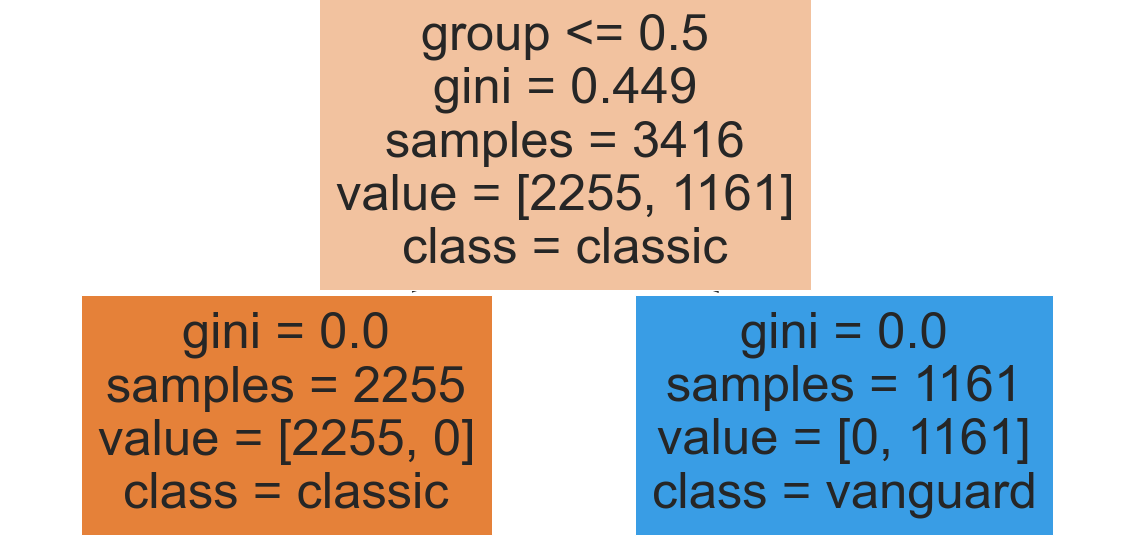

In [20]:
# Tree viz
plot_tree(model_tree3,
          feature_names=X3_train.columns,
          class_names=artists,
          filled=True)

plot_tree(model_tree4,
          feature_names=X4_train.columns,
          class_names=artists,
          filled=True)

plot_tree(model_tree5,
          feature_names=X5_train.columns,
          class_names=artists,
          filled=True);

In [ ]:
# Predict
preds3 = model_tree3.predict(X3_test)
preds4 = model_tree4.predict(X4_test)
preds5 = model_tree5.predict(X5_test)

preds_proba3 = model_tree3.predict_proba(X3_test)
preds_proba4 = model_tree4.predict_proba(X4_test)
preds_proba5 = model_tree5.predict_proba(X5_test)

In [23]:
# Build confusion matrix
conf_matrix = confusion_matrix(y_test, preds)

# Build aux confusion matrix (subtotals by row)
cm_tbyrow = conf_matrix/conf_matrix.sum(axis=1)

# Build aux confusion matrix (subtotals from whole)
cm_t = conf_matrix/conf_matrix.sum()

# Build aux DataFrame to show tags by row
cm_df = pd.DataFrame(conf_matrix,
                     columns=['Pred. class 1',
                              'Pred. class 2'],
                     index=['Actual. class 1',
                            'Actual. class 2'])

########## TODO ##########
# Create function
_counts = [f'Counts: {value:.0f}' for value in conf_matrix.flatten()]

_percentages = [f'{value:.2%} of class' for value in cm_tbyrow.flatten()]

_global_percentages = [f'{value:.2%} of whole' for value in cm_t.flatten()]

labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in zip(_counts, _percentages, _global_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm_df,
            annot=labels, annot_kws={"size": 15},
            fmt='',
            square=True,
            cmap='Blues', cbar=False)

plt.ylabel("ACTUAL", fontsize=15)
plt.xlabel("PREDICTED", fontsize=15);

___
### NEURAL NETWORK

Para red neuronal:  
* Convolución, relu, max_pooling [...] flatten, red neuronal clásica, dropout (para no overfitting) un 25% por ejemplo
* img cuadradras (no recortadas, sino rescaladas)
* escalar los valores de los píxeles (RGB / 255) para que cada píxel valga entre 0 y 1
* mezclar los datos (shuffle) para que no tienda a predecir la última clase que se le pase
* número de filtros alto (32 para distinguir perros o gatos, así que empezamos por 64/128) de dim 5x5 (nº de filtros y dimensión del filtro son discreccionales)

* puedo generar datos a partir de la librería ImageDataGenerator que coge mis imágenes y las gira, estira, desenfoca... En cada época, coge una de las variaciones para que generalice mejor.

___
### CONVOLUTIONAL NEURAL NETWORK

In [180]:
IMG_WIDTH=50
IMG_HEIGHT=50
IMG_CHANNELS=3
IMG_SIZE=(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)
BATCH_SIZE = 10
EPOCHS = 5

In [ ]:
raw_museum_data concatenado con y_target

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from skimage.io import imread
# pip install opencv-python 
import cv2

(954, 1698, 4)
255
[[[188 194 246 255]
  [187 193 237 255]
  [188 194 246 255]
  ...
  [176 184 222 255]
  [176 184 222 255]
  [176 184 222 255]]

 [[188 194 246 255]
  [187 193 237 255]
  [188 194 246 255]
  ...
  [176 184 222 255]
  [176 184 222 255]
  [176 184 222 255]]

 [[187 193 237 255]
  [188 194 246 255]
  [176 184 222 255]
  ...
  [176 184 222 255]
  [176 184 222 255]
  [176 184 222 255]]

 ...

 [[203 210 234 255]
  [203 210 234 255]
  [206 211 247 255]
  ...
  [217 225 252 255]
  [217 225 252 255]
  [217 225 252 255]]

 [[203 210 234 255]
  [203 210 234 255]
  [203 210 234 255]
  ...
  [217 225 252 255]
  [217 225 252 255]
  [217 225 252 255]]

 [[206 211 247 255]
  [203 210 234 255]
  [206 211 247 255]
  ...
  [217 225 252 255]
  [217 225 252 255]
  [217 225 252 255]]]


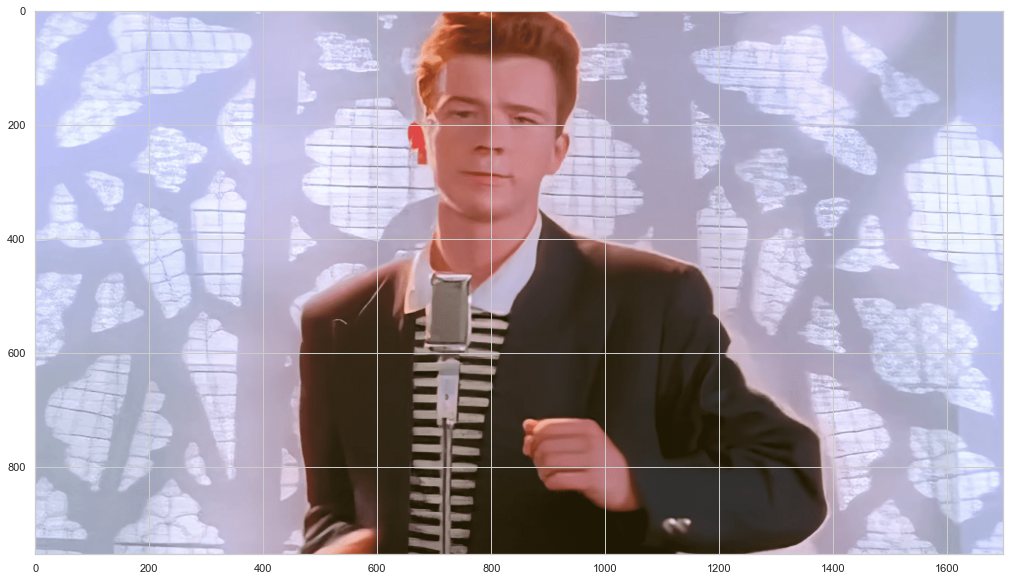

In [7]:
# Sample image
files = get_collection('./sample_img', extensions=['.jpeg'])
file = str(random.choice(files))

img = imread(file)

print(img.shape)
print(np.max(img))
print(img)
plt.imshow(img);

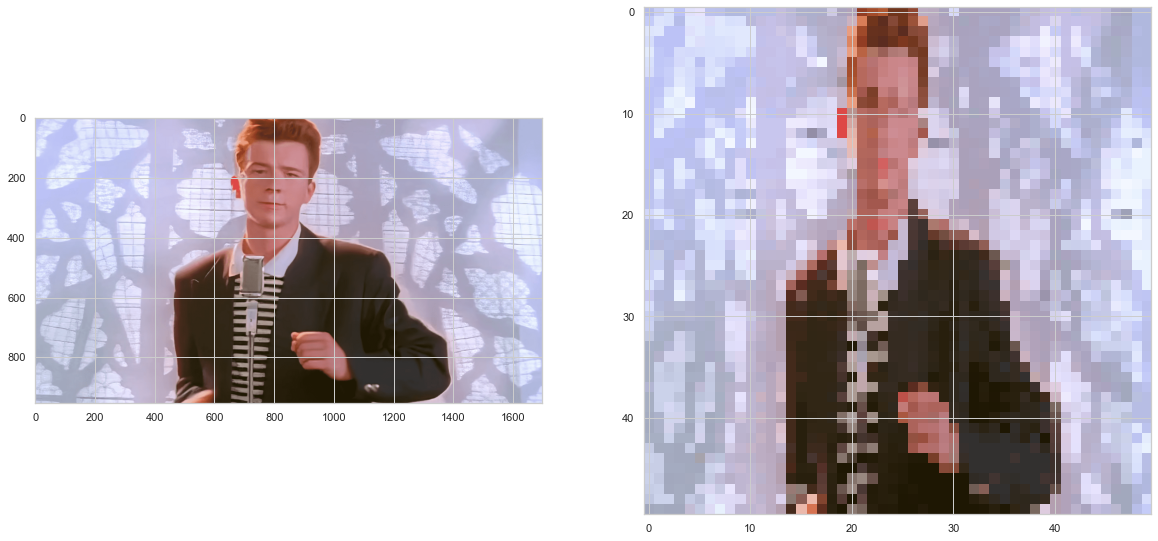

In [8]:
# Img resize
img_mini = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Resized image
plt.subplot(1, 2, 2)
plt.imshow(img_mini);

In [193]:
# Get images, resize, shuffle train/test split and normalize
def img_train_test_split(path='',
                         extensions=[],
                         test_percentage=20,
                         px=50,
                         norm=True,
                         random_state=42):
    # Fix seed for random selection
    if random_state:
        np.random.RandomState(random_state)
    
    # capture
    files = get_collection(path, extensions=extensions)

    # Turn paths into strins
    files = [str(file) for file in files]
        
    # Train/test selection with test_percentage of the images
    test_size = (len(files) * test_percentage) // 100
    test_files = np.random.choice(files, size=test_size)

    train_files = [file for file in files if file not in test_files]
    
    X_train = []
    X_test = []

    for train_file in train_files:
        train_img = imread(train_file)
        train_img_mini = cv2.resize(train_img, (px, px))
       
        X_train.append(train_img_mini)
        
    for test_file in test_files:
        test_img = imread(test_file)
        test_img_mini = cv2.resize(test_img, (px, px))
        
        X_test.append(test_img_mini)
        
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    
    # Normalize
    if norm:
        X_train = X_train / 255.0
        X_test = X_test / 255.0
        
    return X_train, X_test

X_train, X_test = img_train_test_split('./sample_img/',
                                       extensions=['.jpg'],
                                       test_percentage=20,
                                       px=IMG_HEIGHT,
                                       norm=True,
                                       random_state=42)

In [194]:
X_test.shape, X_train.shape

((2, 50, 50, 3), (8, 50, 50, 3))

In [195]:
X_test[0]

array([[[0.75686275, 0.24705882, 0.49803922],
        [0.75686275, 0.24705882, 0.48627451],
        [0.82745098, 0.31372549, 0.54509804],
        ...,
        [0.44313725, 0.18039216, 0.25490196],
        [0.11372549, 0.13333333, 0.2       ],
        [0.00784314, 0.00784314, 0.21176471]],

       [[0.74117647, 0.25882353, 0.48235294],
        [0.74117647, 0.25490196, 0.51372549],
        [0.74117647, 0.24313725, 0.50980392],
        ...,
        [0.49411765, 0.23921569, 0.27058824],
        [0.34117647, 0.20392157, 0.22745098],
        [0.09803922, 0.04705882, 0.14901961]],

       [[0.89019608, 0.36470588, 0.49411765],
        [0.87843137, 0.36862745, 0.49019608],
        [0.9372549 , 0.43137255, 0.49803922],
        ...,
        [0.55686275, 0.31764706, 0.30196078],
        [0.51372549, 0.23137255, 0.28235294],
        [0.20784314, 0.0745098 , 0.13333333]],

       ...,

       [[0.50196078, 0.37254902, 0.03921569],
        [0.37647059, 0.37254902, 0.04313725],
        [0.60392157, 0

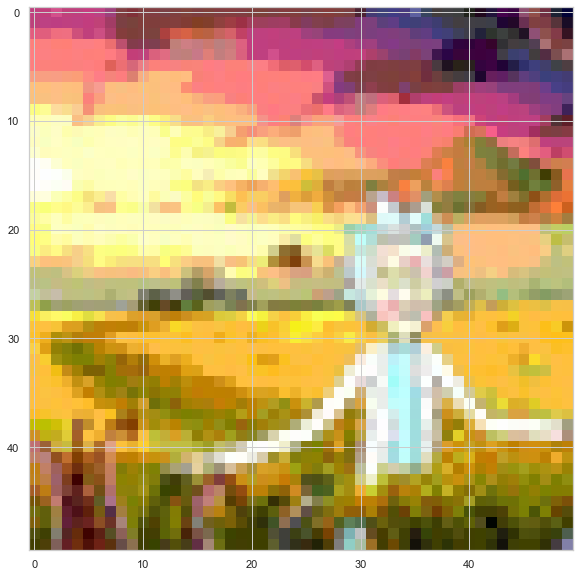

In [196]:
plt.imshow(X_test[0]);

___
### EXPORT DATA

In [ ]:
np.savez('tt_split.npz',
         X_train=X_train,
         X_test=X_test,
         y_train=y_train,
         y_test=y_test)

tt_split = np.load('tt_split.npz')

X_train = tt_split['X_train']
X_test = tt_split['X_test']
y_train = tt_split['y_train']
y_test = tt_split['y_test']

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

model = Sequential()

model.add(Conv2D(32, (3,3),
                 activation='relu',
                 input_shape=(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,
                activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(15,
                activation='softmax')) 

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:

y_train

history = model.fit(X_train,
          y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_split=0.2)

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

results = model.evaluate(X_test, y_test)
print("test loss, test accuracy",results)

plt.imshow(X_test[0]);
model.predict(X_test[0])

X_test[0].shape
np.expand_dims(X_test[0], axis=0).shape
model.predict(np.expand_dims(X_test[0], axis=0))
plt.imshow(X_test[5]);
model.predict(np.expand_dims(X_test[5],axis=0))